# Today you are a Data Scientist at Tesla! 
## You have been assigned a new project to look at car sales from Quarters 1-2 in California for 2019 to make predictions as to which cars will be sold more than the others in Q3 and Q4, to ensure enough inventory to meet demands!

### If running this notebook in Google Colab, run the following cell first to mount your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

^^ This mounts your Google Drive at the location */content/drive* on the virtual machine running this notebook.

# Task 1: Load data and wrangle training and test sets

### Import some modules we'll make use of

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100000
pd.options.display.max_rows = 999990

### Read in the CSV file containing the California sales data for Quarters 1 and 2

Then examine the data's shape and first few rows

In [5]:
# my copy of the Tesla sales data is located in my drive at /Datasets/week_1/
df_sales = pd.read_csv('sales_Q12_2019.csv')

In [6]:
print(df_sales.shape)
df_sales.head()

(5837, 76)


,main_S60_1,main_S60_2,main_type_SP100D,main_type_S60D_1,main_type_S60D_2,main_type_S70,main_type_S70D,main_type_S75,main_type_S75D,main_type_S80,main_type_S80D,main_type_S85,main_type_S85P,main_type_P85D,main_type_S90,main_type_S90D,main_type_S100D,engine_A,engine_B,engine_C,engine_D,engine_E,engine_F,engine_G,engine_H,engine_I,engine_J,engine_K,engine_L,engine_M,engine_N,engine_O,engine_P,engine_Q,engine_R,engine_S,engine_T,engine_U,engine_V,engine_W,engine_X,engine_Y,engine_Z,sales_1,sales_2,sales_3,sales_4,sales_5,sales_6,sales_7,sales_8,sales_9,sales_10,sales_11,sales_12,sales_13,sales_14,sales_15,sales_16,sales_17,sales_18,sales_19,sales_20,sales_21,sales_22,sales_23,sales_24,sales_25,sales_26,sales_27,sales_28,sales_29,sales_30,MSRP,dealer_state,date
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44610,California,2019-04-28
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41505,California,2019-03-14
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58890,California,2019-06-12
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51055,California,2019-03-04
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70830,California,2019-01-23


In [7]:
print(df_sales.columns)

Index(['main_S60_1', 'main_S60_2', 'main_type_SP100D', 'main_type_S60D_1',
       'main_type_S60D_2', 'main_type_S70', 'main_type_S70D', 'main_type_S75',
       'main_type_S75D', 'main_type_S80', 'main_type_S80D', 'main_type_S85',
       'main_type_S85P', 'main_type_P85D', 'main_type_S90', 'main_type_S90D',
       'main_type_S100D', 'engine_A', 'engine_B', 'engine_C', 'engine_D',
       'engine_E', 'engine_F', 'engine_G', 'engine_H', 'engine_I', 'engine_J',
       'engine_K', 'engine_L', 'engine_M', 'engine_N', 'engine_O', 'engine_P',
       'engine_Q', 'engine_R', 'engine_S', 'engine_T', 'engine_U', 'engine_V',
       'engine_W', 'engine_X', 'engine_Y', 'engine_Z', 'sales_1', 'sales_2',
       'sales_3', 'sales_4', 'sales_5', 'sales_6', 'sales_7', 'sales_8',
       'sales_9', 'sales_10', 'sales_11', 'sales_12', 'sales_13', 'sales_14',
       'sales_15', 'sales_16', 'sales_17', 'sales_18', 'sales_19', 'sales_20',
       'sales_21', 'sales_22', 'sales_23', 'sales_24', 'sales_25', 'sales

### Begin cleaning the data

Eliminate the `'dealer_state'` and `'date'` columns. The former is useless to our model, since we already know that our dataset is restricted to California sales. While we could possibly extract useful information from the `'date'` column (for example, to determine whether more cars are sold on weekends than weekdays), we'll be focusing on car configurations in this exercise.

In [8]:
df_sales = df_sales.drop(columns=['dealer_state','date'])
print(df_sales.shape)
df_sales.head()

(5837, 74)


,main_S60_1,main_S60_2,main_type_SP100D,main_type_S60D_1,main_type_S60D_2,main_type_S70,main_type_S70D,main_type_S75,main_type_S75D,main_type_S80,main_type_S80D,main_type_S85,main_type_S85P,main_type_P85D,main_type_S90,main_type_S90D,main_type_S100D,engine_A,engine_B,engine_C,engine_D,engine_E,engine_F,engine_G,engine_H,engine_I,engine_J,engine_K,engine_L,engine_M,engine_N,engine_O,engine_P,engine_Q,engine_R,engine_S,engine_T,engine_U,engine_V,engine_W,engine_X,engine_Y,engine_Z,sales_1,sales_2,sales_3,sales_4,sales_5,sales_6,sales_7,sales_8,sales_9,sales_10,sales_11,sales_12,sales_13,sales_14,sales_15,sales_16,sales_17,sales_18,sales_19,sales_20,sales_21,sales_22,sales_23,sales_24,sales_25,sales_26,sales_27,sales_28,sales_29,sales_30,MSRP
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44610
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41505
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58890
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51055
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70830


### Read in the CSV file containing the California sales data for Quarters 3 and 4

The `'dealer_state'` and `'date'` columns have already been eliminated in this dataset, so you don't need to worry about them here. Examine the data's shape and first few rows.

In [9]:
# my copy of the Tesla sales data is located in my drive at /Datasets/week_1/
df_pred = pd.read_csv('sales_Q34_2019.csv')
print(np.shape(df_pred))
print(df_pred.columns)
df_pred.head()

(6666, 74)
Index(['main_S60_1', 'main_S60_2', 'main_type_SP100D', 'main_type_S60D_1',
       'main_type_S60D_2', 'main_type_S70', 'main_type_S70D', 'main_type_S75',
       'main_type_S75D', 'main_type_S80', 'main_type_S80D', 'main_type_S85',
       'main_type_S85P', 'main_type_P85D', 'main_type_S90', 'main_type_S90D',
       'main_type_S100D', 'engine_A', 'engine_B', 'engine_C', 'engine_D',
       'engine_E', 'engine_F', 'engine_G', 'engine_H', 'engine_I', 'engine_J',
       'engine_K', 'engine_L', 'engine_M', 'engine_N', 'engine_O', 'engine_P',
       'engine_Q', 'engine_R', 'engine_S', 'engine_T', 'engine_U', 'engine_V',
       'engine_W', 'engine_X', 'engine_Y', 'engine_Z', 'sales_1', 'sales_2',
       'sales_3', 'sales_4', 'sales_5', 'sales_6', 'sales_7', 'sales_8',
       'sales_9', 'sales_10', 'sales_11', 'sales_12', 'sales_13', 'sales_14',
       'sales_15', 'sales_16', 'sales_17', 'sales_18', 'sales_19', 'sales_20',
       'sales_21', 'sales_22', 'sales_23', 'sales_24', 'sales_

,main_S60_1,main_S60_2,main_type_SP100D,main_type_S60D_1,main_type_S60D_2,main_type_S70,main_type_S70D,main_type_S75,main_type_S75D,main_type_S80,main_type_S80D,main_type_S85,main_type_S85P,main_type_P85D,main_type_S90,main_type_S90D,main_type_S100D,engine_A,engine_B,engine_C,engine_D,engine_E,engine_F,engine_G,engine_H,engine_I,engine_J,engine_K,engine_L,engine_M,engine_N,engine_O,engine_P,engine_Q,engine_R,engine_S,engine_T,engine_U,engine_V,engine_W,engine_X,engine_Y,engine_Z,sales_1,sales_2,sales_3,sales_4,sales_5,sales_6,sales_7,sales_8,sales_9,sales_10,sales_11,sales_12,sales_13,sales_14,sales_15,sales_16,sales_17,sales_18,sales_19,sales_20,sales_21,sales_22,sales_23,sales_24,sales_25,sales_26,sales_27,sales_28,sales_29,sales_30,MSRP
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,51355
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71580
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66790
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72330
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55370


### Set up a regression problem that uses car IDs to predict proportion of # sold. 

You've probably noticed that 73 of the 74 columns in our Q12 and Q34 datasets
are one-hot-encoded representations of the car's `'main_type'`, `'engine'`, and 
`'sales_version'` values. This could be viewed as a unique ID for each type of car. You've probably also noticed that the final column is 
the car's `'MSRP'`, or manufacturer's (Tesla's, in this case) suggested retail price. You could do several things with this data--we're asking you to fit a model of the **proportion of cars sold** based on the unique ID. You'll fit the model on Q12 data and test it on Q34 data. We won't use MSRP.

Each row in the dataset represents the sale of a single car. So, we can count up
the number of rows with a particular ID, and this gives us the number of times that specific type of car was sold in California during that time period. This number divided by the total number sold is the proportion of sales attributed to this particular type of car.

<!-- 


Consolidate data by finding numbers of unique car combinations sold for training and test data sets



However, each row represents the sale of a single car. If we define a unique car type by its combination of `'main_type'`, `'engine'`, and `'sales_version'` values, the number of rows displaying that combination corresponds to the number of times during that half of the year that that distinct type of car was sold in California. Therefore, we can make training and test datasets where each row now corresponds to a unique car type, and the target value is how many times that car type was sold in California during a given half of the year.

## This task requires data wrangling!
## Create functions that read the Q12 (df_sales) and Q34 (df_pred) data sets and create train_X, train_Y, test_X and test_Y, respectively. Use pandas and NumPy as needed. -->

**Create a Python function called ``get_features_and_targets`` that takes in a quarterly sales dataframe and produces matrices $\mathbf{X}$ and $\mathbf{Y}$, where $\mathbf{X}$ has in each row a unique car ID and the corresponding row of $\mathbf{Y}$ has that specific car's proportion of total sales for the quarter**

In [10]:
def get_features_and_targets(df):
    temp=df.groupby(list(df.columns[:-1]), as_index=False).size()
    temp.rename(columns={'size':'proportion'}, inplace=True)
    temp['proportion']=temp['proportion']/df.shape[0]
    X=temp.iloc[:,:-1]
    Y=temp.iloc[:,-1]
    return X, Y
  # YOUR CODE HERE

### Use your function to create $\mathbf{X}$, $\mathbf{Y}$, pairs for both the training data and the test data:

In [11]:
train_X, train_Y = get_features_and_targets(df_sales)
test_X, test_Y = get_features_and_targets(df_pred)
print(np.shape(train_X))
print(f"Number of unique cars in Q12 = {len(train_Y)}")
print(f"Number of unique cars in Q34 = {len(test_Y)}")

(66, 73)
Number of unique cars in Q12 = 66
Number of unique cars in Q34 = 71


Okay, so let's note that the Q12 and Q34 datasets contain differing numbers of distinct cars. Clearly, some new models were introduced by Q3, but were any discontinued by the end of Q2? Let's find out.

Print the number of cars that were sold in either Q12 or Q34, or both. In mathematical notation, if the set of cars sold in Q12 is $\mathcal{A}$ and the set of cars sold in Q34 is $\mathcal{B}$, we're asking for the size of the *union* of these two sets $|\mathcal{A} \cup \mathcal{B}|$. The notation $|\cdot|$ indicates measurement of the size of a set, the number of distinct items. (Mathematicians usually refer to it as the *cardinality*)

In [12]:
## YOUR CODE HERE
total=pd.concat([df_sales, df_pred])
total_x, total_Y = get_features_and_targets(total)
print(f"Number of unique cars sold = {len(total_x)}")

Number of unique cars sold = 80


A handy little fact from set theory is that $|\mathcal{A} \cup \mathcal{B}| = |\mathcal{A}| + |\mathcal{B}| - |\mathcal{A} \cap \mathcal{B}|$, where $\cap$ is the *intersection* of $\mathcal{A}$ and $\mathcal{B}$, things that are in **both** $\mathcal{A}$ and $\mathcal{B}$. Use this fact, and what you've computed above, to print the number of models that were sold in both Q12 and Q34.

In [13]:
## YOUR CODE HERE
print(f"Number of unique cars sold in both Q12 and Q34 = {len(train_Y) + len(test_Y)-len(total_Y)}")

Number of unique cars sold in both Q12 and Q34 = 57


How many cars that were sold in Q12 were discontinued by Q34?

In [14]:
## YOUR CODE HERE
print(f"Number of unique cars discontinued in Q34 = {len(total_Y)-len(test_Y)}")

Number of unique cars discontinued in Q34 = 9


How many cars were launched in Q34?

In [15]:
## YOUR CODE HERE
print(f"Number of unique cars launched in Q34 = {len(total_Y)-len(train_Y)}")

Number of unique cars launched in Q34 = 14


# Task 2: Visualize the training and test targets any way you see fit

This is super open-ended and we're not expecting a particular visualization, just show us what comes comes to your mind!

In [18]:
sales_1Q = df_sales.groupby(list(df_sales.columns[:-1])).size().reset_index(name='Count')  # https://stackoverflow.com/questions/36018851/pandas-counting-unique-rows
sales_3Q=df_pred.groupby(list(df_pred.columns[:-1])).size().reset_index(name='Count')

import plotly.offline as pyo
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.express as px
trace1=go.Bar(
x=sales_1Q.index,
y=sales_1Q['Count'], name='Sales12Q',)

trace2=go.Bar(
x=sales_3Q.index,
y=sales_3Q['Count'],name='Sales34Q',)

data = [trace1, trace2]
layout = go.Layout(
title=''
)
fig = go.Figure(data=data, layout=layout)
#pyo.plot(fig)
fig.show()

# Task 3: Fit a linear model with gradient descent

Set hyperparameters for learning rate and maximum number of iterations through the training data.

In [19]:
# these are good starting values, you can play around with them though
s_learning_rate = 0.001
s_max_iteration = 1000

### Hypothesis Function

Define your hypothesis function $h(\cdot)$ (which you use to make predictions $\hat{\mathbf{Y}}$ as the matrix product of your feature data $\mathbf{X}$ and parameters $\boldsymbol{\theta}$. $\boldsymbol{\theta}$, which you'll initialize in the training loop (below) is a column vector, one for every feature in the training data, plus one for bias.

In [20]:
# Define your hypothesis function according to the instructions above
def h(theta, X):
    Y_hat=np.dot(X, theta)
    return np.dot(X, theta)
  ## YOUR CODE HERE

Define your loss function as **half** the MSE (mean squared error) between your actual and predicted $\mathbf{Y}$ values. 

Recall that the predicted $\mathbf{Y}$ values, $\hat{\mathbf{Y}}$, are a function of $\boldsymbol{\theta}$ and $\mathbf{X}$.


In [21]:
# Loss Function
def loss (theta, X, Y) :
    #Y_hat=X.dot(theta)#np.dot(X, theta)
    Y_hat=h(theta, X)
    return 0.5.np.mean(Y-Y_hat)**2
  ## YOUR CODE HERE
    

### Gradient of Hypothesis Function

One can verify through straightforward (if somewhat tedious) multivariable calculus that the gradient of the loss function $J$ with respect to the parameters $\theta$ is 

$$ \frac{\partial J}{\partial \boldsymbol{\theta}} = - \frac{1}{m} X^T \cdot (Y - \hat{Y})$$

Where $m$ is the number of data samples, the number of rows in $\mathbf{X}$ and $\mathbf{Y}$.

Note that the $\mathbf{X}$ here is the one that has been augmented with a bias column. 

Set up a function ``gradient`` to compute this gradient.

In [22]:
def gradient (theta, X, Y) :
    m, X= X.shape
    return -1 * np.dot(X.T, Y - h(theta, X)) / X.shape[0]
  ## YOUR CODE HERE


### Gradient Descent

Complete the function ``stochastic_gradient_descent`` below, to train your linear regression model with gradient descent, i.e. calculate $\frac{\partial J}{\partial \theta}$ and update $\theta$. Recall that the general gradient descent update formula is $\theta := \theta - \alpha \frac{\partial J}{\partial \theta}$, with $\alpha$ the stepsize. We've provided the skeleton of a stochastic gradient descent function, but you're welcome to experiment with batch and/or minibatch gradient descent. Also recall that the aforementioned gradient descent methods differ in how frequently they calculate $\frac{\partial J}{\partial \theta}$ and update $\theta$. Notice in the first step we initialize $\boldsymbol{\theta}$ to all zeros and we temporarily prepend a column of $1$'s to the features, which corresponds to the bias parameter.

In [34]:
def stochastic_gradient_descent(X, Y, learning_rate, max_iteration, print_interval):
    theta = np.zeros((X.shape[1]+1, 1))
    X_with_ones = np.hstack([np.ones([X.shape[0], 1]), X])  # prepend a column of 1s. This is just to make the math more compact, your original data is still X[:, 1:]
  # Initialize the cost as an array of zeros, one for each iteration through the dataset
    cost = np.zeros(max_iteration)
  # Loop over the dataset
    for i in range(max_iteration):
    # Loop over each row in the dataset
        for j in range(X.shape[0]):# Compute the gradient from the current row in X and the associated Y value
      # Make sure that both X and Y are represented as 2D row vectors
            X_2d=X_with_ones[j,:][None, :]
            y_2d=Y[j,:][None, :]
            grad=gradient(theta, X_2d, y_2d)
        # Update theta
            theta=theta-learning_rate*grad
    # Update the cost array for the current iteration for each iteration
    cost[i] = loss(theta, X_with_ones, Y)
    if i % print_interval == 0 :
        print('iteration : ', i, ' loss : ', loss(theta, X_with_ones, Y)) 
    return theta, cost

In [35]:
s_theta, s_cost = stochastic_gradient_descent(train_X, train_Y, s_learning_rate, s_max_iteration, 100)

KeyError: 'key of type tuple not found and not a MultiIndex'

In [36]:
plt.stem(np.squeeze(s_theta))

NameError: name 's_theta' is not defined

### Generate Predictions from Test Data

In [ ]:
# remember that s_theta should be applied to features that have a prepended column of 1's
pred_Y_from_GD = h(s_theta, np.hstack([np.ones([test_X.shape[0], 1]), test_X]))
# Set any negative predictions to 0
pred_Y_from_GD[pred_Y_from_GD<0] = 0

### Visualize the predicted and actual test labels

In [40]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [41]:
# compare predictions pred_Y_from_GD to test_Y. Report MSE and R^2 score
MSE(test_Y, pred_Y_from_GD)
r2_score(test_Y, pred_Y_from_GD)
## YOUR CODE HERE

NameError: name 'pred_Y_from_GD' is not defined

# Task 4: Normal Equations

Since our training dataset isn't very large, let's generate predictions using the normal equations: 

$$\boldsymbol{\theta} = (X^T \cdot X)^{-1} \cdot X^T \cdot Y$$ 
$$\hat{Y} = X \cdot \boldsymbol{\theta}$$

and see how they compare to the predictions which we obtained from gradient descent. Remember we still have a bias term, so $\boldsymbol{\theta}$ is of size 74x1 (73 for the unique ID features, 1 for the bias)

In [42]:
def normal_equations_solution(X, Y):
    X_with_ones = np.hstack([np.ones([X.shape[0], 1]), X])
    theta=np.dot(np.linalg.pinv(X_with_ones), Y)
    return theta

In [43]:
# Compute the predicted Y values
n_theta = normal_equations_solution(train_X, train_Y)
pred_Y_from_N = np.matmul(np.hstack([np.ones([test_X.shape[0], 1]), test_X]), n_theta)

# Set any negative predictions to 0
pred_Y_from_N[np.where(pred_Y_from_N<0)]=0

In [44]:
print(f"MSE = {MSE(test_Y, pred_Y_from_N)}")
print((f"R2 = {r2_score(test_Y, pred_Y_from_N)}"))

MSE = 0.00015900598697866014
R2 = 0.5415619143191437


In [45]:
results=pd.DataFrame(pred_Y_from_N, columns=['estimation'])

results=results.merge(pd.DataFrame(test_Y), left_index=True, right_index=True)

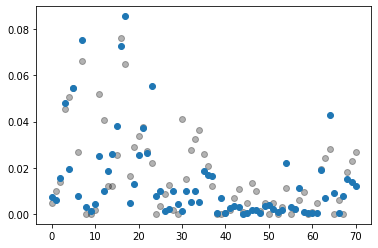

In [46]:
plt.scatter(results.index, results['estimation'],color='k', alpha=0.3)
plt.scatter(results.index, results['proportion'])


### Regularized Normal Equations

In [47]:
print('Recall that our training features array train_X has')
print(f'm = {train_X.shape[0]} rows and n = {train_X.shape[1]} columns')

Recall that our training features array train_X has
m = 66 rows and n = 73 columns


`train_X` is thus wider than it is tall, which suggests that the regularized normal equations might perform better in generating label predictions. In this case, we modify the first of the normal equations given above to 

$$\boldsymbol{\theta} = (X^T \cdot X + \lambda m I)^{-1} \cdot X^T \cdot Y$$.

Here, $\lambda$ is the regularization parameter and $m$ is the number of rows in $X$.

### Repeat the previous parts of Task IV, but this time incorporate regularization

In [48]:
def regularized_normal_equations_solution(X, Y, regularization_param):
    X_with_ones = np.hstack([np.ones([train_X.shape[0], 1]), train_X])
    theta=np.dot(np.linalg.inv(np.dot(X_with_ones.T, X_with_ones) + regularization_param * X.shape[0] * np.identity(X_with_ones.shape[1])),
      np.matmul(X_with_ones.T, Y))
    return theta
    

In [49]:
test_these_lambdas = np.linspace(0.01, 10, 10)

for i in test_these_lambdas:
  theta_temp = regularized_normal_equations_solution(train_X, train_Y, i)
  pred_Y_from_N_reg = np.matmul(np.hstack([np.ones([test_X.shape[0], 1]), test_X]), theta_temp)
  pred_Y_from_N_reg[np.where(pred_Y_from_N_reg<0)]=0
  print('For regularization parameter', i)
  print("RMSE, R2 =", MSE(test_Y, pred_Y_from_N_reg), r2_score(test_Y, pred_Y_from_N_reg))
  print('-----')

For regularization parameter 0.01
RMSE, R2 = 0.00013572695793108593 0.6086788431585037
-----
For regularization parameter 1.12
RMSE, R2 = 0.0003404530943224867 0.018422716081303303
-----
For regularization parameter 2.23
RMSE, R2 = 0.0003924508437774036 -0.13149458686291915
-----
For regularization parameter 3.34
RMSE, R2 = 0.00042300887507005933 -0.21959796984975544
-----
For regularization parameter 4.45
RMSE, R2 = 0.000443389726721268 -0.27835901899678883
-----
For regularization parameter 5.5600000000000005
RMSE, R2 = 0.0004579636767466423 -0.3203779006590106
-----
For regularization parameter 6.67
RMSE, R2 = 0.00046890007772475275 -0.35190918337301347
-----
For regularization parameter 7.78
RMSE, R2 = 0.0004774071570102474 -0.3764363676412439
-----
For regularization parameter 8.89
RMSE, R2 = 0.0004842119364762752 -0.3960555664598697
-----
For regularization parameter 10.0
RMSE, R2 = 0.0004897780313997582 -0.41210345213968336
-----


# Task V: Non-linear Regression Models (GLM, DT) 

### Generalized Linear Models

`sm` (our alias for `statsmodels.api`) contains a `GLM` class. Use it to instantiate a model. The relevant parameters are training labels, training features, and `ffamily`, i.e. the family of distributions to which we assume our prediction errors belong. Some potentially good choices for `ffamily` include Gaussian, Gamma, and Logit.

In [50]:
# GLM 
import statsmodels.api as sm
# Instantiate the GLM
train_X_glm = sm.add_constant(train_X)
glm_gamma = sm.GLM(train_Y, train_X_glm, family=sm.families.Gaussian())
# Train the GLM
glm_results = glm_gamma.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             proportion   No. Observations:                   66
Model:                            GLM   Df Residuals:                       35
Model Family:                Gaussian   Df Model:                           30
Link Function:               identity   Scale:                      0.00050810
Method:                          IRLS   Log-Likelihood:                 177.58
Date:                Sat, 07 Aug 2021   Deviance:                     0.017784
Time:                        19:07:51   Pearson chi2:                   0.0178
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0147      0.009  

C:\Users\FLORENCIA\anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\FLORENCIA\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\FLORENCIA\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\FLORENCIA\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


### Generate predictions from the test data

In [51]:
# generate predictions, called pred_Y_from_GLM. (don't forget to add a constant column to test_X)
## YOUR CODE HERE
pred_Y_from_GLM=
# Set any negative predictions to 0
pred_Y_from_GLM[pred_Y_from_GLM<0]=0

SyntaxError: invalid syntax (<ipython-input-51-3421e6378926>, line 3)

In [ ]:
# Plot predictions compared to test_Y, and also print MSE and R^2 score
## YOUR CODE HERE

### Random Forest Regression

Use the `RandomForestRegressor` from `sklearn.ensemble` to generate predictions. The relevant parameters are the `max_depth` of the trees and the `random_state`, to ensure reproducibility.

In [52]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate the random forest regression model
regr = RandomForestRegressor(max_depth=5, random_state=0)
# Train the model
regr.fit(train_X, train_Y)
## YOUR CODE HERE
# Generate predictions from the test data
## YOUR CODE HERE
pred_Y_from_RF = regr.predict(test_X)

MSE = 9.71818540120476e-05
R2 = 0.7198101532983234


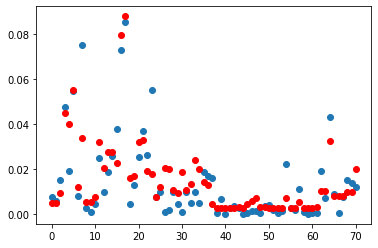

In [53]:
# Plot predictions compared to test_Y, and also print MSE and R^2 score
## YOUR CODE HERE
print(f"MSE = {MSE(test_Y, pred_Y_from_RF)}")
print((f"R2 = {r2_score(test_Y, pred_Y_from_RF)}"))
plt.scatter(range(len(test_Y)), test_Y)
plt.scatter(range(len(pred_Y_from_RF)), pred_Y_from_RF,  color='red')


## Populate the table below with the results of your experiments above. Which models performed best?

In [ ]:
## Results

|Method      |RMSE             |R2               |
|------------|-----------------|-----------------|
| Gradient Descent | xx | xx|
| Normal Equations | 0.00015900598697866014 | 0.54 |
| Regularized Normal Equations | 0.00 | 0.60 |
| Generalized Linear Model (GLM) | xx | xx |
| Random Forests | 0.00 | 0.71 |


### Ramdom Forest performed better